Chapter 20

# K均值聚类
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
# ! pip install --upgrade threadpoolctl

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# Create color maps
rgb = [[255, 238, 255],  # red
       [219, 238, 244],  # blue
       [228, 228, 228]]  # black
rgb = np.array(rgb)/255.

cmap_light = ListedColormap(rgb)

In [3]:
# 导入鸢尾花数据
iris = datasets.load_iris()

In [4]:
# Only use the first two features: sepal length, sepal width
# 取出鸢尾花前两个特征
X_train = iris.data[:, :2]

In [6]:
# X_train

In [5]:
# Vector of labels
y_train = iris.target

In [14]:
# KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

In [13]:
# 创建KMeans对象
kmeans = KMeans(n_clusters=3, n_init = 'auto')

In [8]:
# 使用KMeans算法训练数据
kmeans.fit(X_train)

KMeans(n_clusters=3, n_init='auto')

In [10]:
# 生成网格数据
plot_step = 0.02
xx, yy = np.meshgrid(np.linspace(4, 8, int(4/plot_step + 1)),
                     np.linspace(1.5, 4.5, int(3/plot_step + 1)))

In [11]:
# 使用KMeans模型对网格中的点进行预测
# 并将预测结果整形成与网格相同形状的矩阵
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

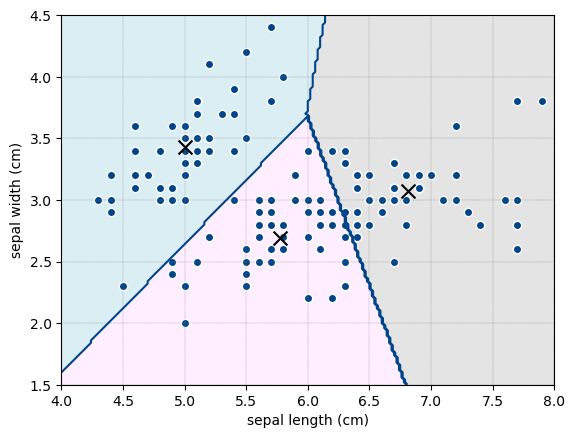

In [12]:
fig, ax = plt.subplots()

# plot regions
plt.contourf(xx, yy, Z, cmap=cmap_light)

# plot sample data
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], color=np.array([0, 68, 138])/255., alpha=1.0, 
                linewidth = 1, edgecolor=[1,1,1])

# plot decision boundaries
plt.contour(xx, yy, Z, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)

# plot centroids
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1.5,
            color="k")

ax.set_xticks(np.arange(4, 8.5, 0.5))
ax.set_yticks(np.arange(1.5, 5, 0.5))
ax.set_xlim(4, 8)
ax.set_ylim(1.5, 4.5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_aspect('equal')
plt.show()